
# 🐾 Data for the Wild: Understanding Endangered Animals
**Duration:** 20–30 minutes  
**Tools:** Python, pandas, matplotlib  
**Dataset:** Animal Information Dataset (CSV)

**Big Question:** _What can data teach us about endangered animals—and how can we use it to care better?_

Today you'll use real animal data to:
- Clean and standardize messy values (like `"270-310"`).
- Ask and answer questions about **Conservation Status** (e.g., Endangered, Vulnerable).
- Pick **one endangered animal** and compare it with similar species to discover a trend.



## 🎯 Learning Goals
By the end of this activity, you will be able to:
1. Load a CSV into pandas and **inspect** columns and rows.  
2. **Pre-clean** data by converting ranges to numbers and standardizing categories.  
3. Create **subsets** (e.g., all Endangered animals, or all animals in a Family/Habitat).  
4. Use **groupby** + **visualization** to compare your chosen animal to similar species.  
5. **Explain** your findings in clear, simple language.


## 1) Setup & Imports (run this first)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
pd.set_option("display.max_columns", 50)



## 2) Load the Dataset
> If your CSV has a different name or is in another folder, change `DATA_PATH` below.


In [9]:

DATA_PATH = "data/animal-dataset.csv"

animals = pd.read_csv(DATA_PATH)

animals.head()


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12



## 3) First Look at the Data
Let's check columns, data types, and a quick summary.


In [10]:

animals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

In [11]:

animals.describe(include="all")


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,196,162,184,85,93,16,97,113,97,104,12,120,161,71,10,68
top,Pink Fairy Armadillo,Up to 30,Up to 0.5,Various,10-15,Carnivore,Rainforests,Not Applicable,Not Applicable,Worldwide,Least Concern,Canidae,Not Applicable,Not Applicable,Solitary,1
freq,2,4,4,14,21,72,31,13,21,19,68,14,12,31,132,81



## 4) Why Pre‑Clean the Data?
Real datasets are **messy**. In this file, some numbers show up as **ranges** like `"270-310"` or contain non-numeric text.  
If we use these values as-is, our averages and charts would be **wrong**.

**Plan:**  
1. Convert ranges like `"270-310"` into the **mean**: `(270 + 310) / 2 = 290`.  
2. Turn any non-numeric leftovers into **NaN** (missing) and optionally fill when needed.  
3. Standardize text categories like **Conservation Status** (consistent capitalization).

> We choose **median** to fill missing numeric values when necessary because it is less sensitive to outliers than the mean.


In [ ]:
# Run this cell to clean the data

import numpy as np

def to_number_or_nan(x):
    try:
        return float(x)
    except:
        return np.nan

def convert_range_to_mean(value):
    if isinstance(value, str):
        v = value.replace("–", "-").replace("—", "-").strip()
        v = "".join(ch for ch in v if ch.isdigit() or ch in ".-")
        if "-" in v:
            parts = [p for p in v.split("-") if p != ""]
            if len(parts) == 2:
                try:
                    a, b = float(parts[0]), float(parts[1])
                    return (a + b) / 2.0
                except:
                    return to_number_or_nan(v)
        return to_number_or_nan(v)
    return to_number_or_nan(value)

def standardize_status(s):
    if pd.isna(s):
        return s
    s = str(s).strip().title()
    mapping = {
        "Least Concern": "Least Concern",
        "Near Threatened": "Near Threatened",
        "Vulnerable": "Vulnerable",
        "Endangered": "Endangered",
        "Critically Endangered": "Critically Endangered",
        "Extinct In The Wild": "Extinct In The Wild",
        "Extinct": "Extinct",
        "Critically-Endangered": "Critically Endangered",
        "Near-Threatened": "Near Threatened",
    }
    return mapping.get(s, s)



### Apply the Cleaning Steps
We will convert range-values to numbers for key numeric columns and standardize conservation status.


In [13]:

numeric_range_cols = [
    "Height (cm)",
    "Weight (kg)",
    "Lifespan (years)",
    "Average Speed (km/h)",
    "Top Speed (km/h)",
    "Gestation Period (days)",
]

for col in numeric_range_cols:
    if col in animals.columns:
        animals[col] = animals[col].apply(convert_range_to_mean)

if "Conservation Status" in animals.columns:
    animals["Conservation Status"] = animals["Conservation Status"].apply(standardize_status)

for col in numeric_range_cols:
    if col in animals.columns:
        med = animals[col].median(skipna=True)
        animals[col] = animals[col].fillna(med)

animals.head()


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,117.5,52.5,Grey,25.0,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40.0,Africa,Least Concern,Orycteropodidae,225.0,40.0,Solitary,1
1,Aardwolf,45.0,11.0,Yellow-brown,11.0,Insectivore,"Grasslands, Savannas","Lions, Leopards",27.0,Eastern and Southern Africa,Least Concern,Hyaenidae,90.0,40.0,Solitary,2-5
2,African Elephant,290.0,4350.0,Grey,65.0,Herbivore,"Savannah, Forest","Lions, Hyenas",25.0,Africa,Vulnerable,Elephantidae,650.0,40.0,Herd-based,1
3,African Lion,95.0,185.0,Tan,12.0,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58.0,Africa,Vulnerable,Felidae,101.5,80.0,Group-based,2-4 (usually)
4,African Wild Dog,77.5,27.0,Multicolored,11.0,Carnivore,Savannahs,"Lions, Hyenas",56.0,Sub-Saharan Africa,Endangered,Canidae,70.0,56.0,Group-based,10-12



### Quick Sanity Checks
Are the numeric columns numeric now? Do we have consistent conservation labels?


In [14]:

animals.dtypes


Animal                      object
Height (cm)                float64
Weight (kg)                float64
Color                       object
Lifespan (years)           float64
Diet                        object
Habitat                     object
Predators                   object
Average Speed (km/h)       float64
Countries Found             object
Conservation Status         object
Family                      object
Gestation Period (days)    float64
Top Speed (km/h)           float64
Social Structure            object
Offspring per Birth         object
dtype: object

In [15]:

animals["Conservation Status"].value_counts(dropna=False)


Conservation Status
Least Concern                            68
Vulnerable                               36
Endangered                               33
Critically Endangered                    19
Not Evaluated                            15
Near Threatened                          15
Not Applicable                            9
Data Deficient                            4
Varies                                    3
Extinct                                   1
Extinct (Around 58 Million Years Ago)     1
Extinct (Around 4,000 Years Ago)          1
Name: count, dtype: int64


## 5) Choose Your Endangered Animal
> Type the name of an endangered animal below. We'll help you compare it with **similar species**.

**Similarity order (we try in this order):**
1) Same **Family** (best comparison)  
2) Else same **Habitat**  
3) Else same **Diet**


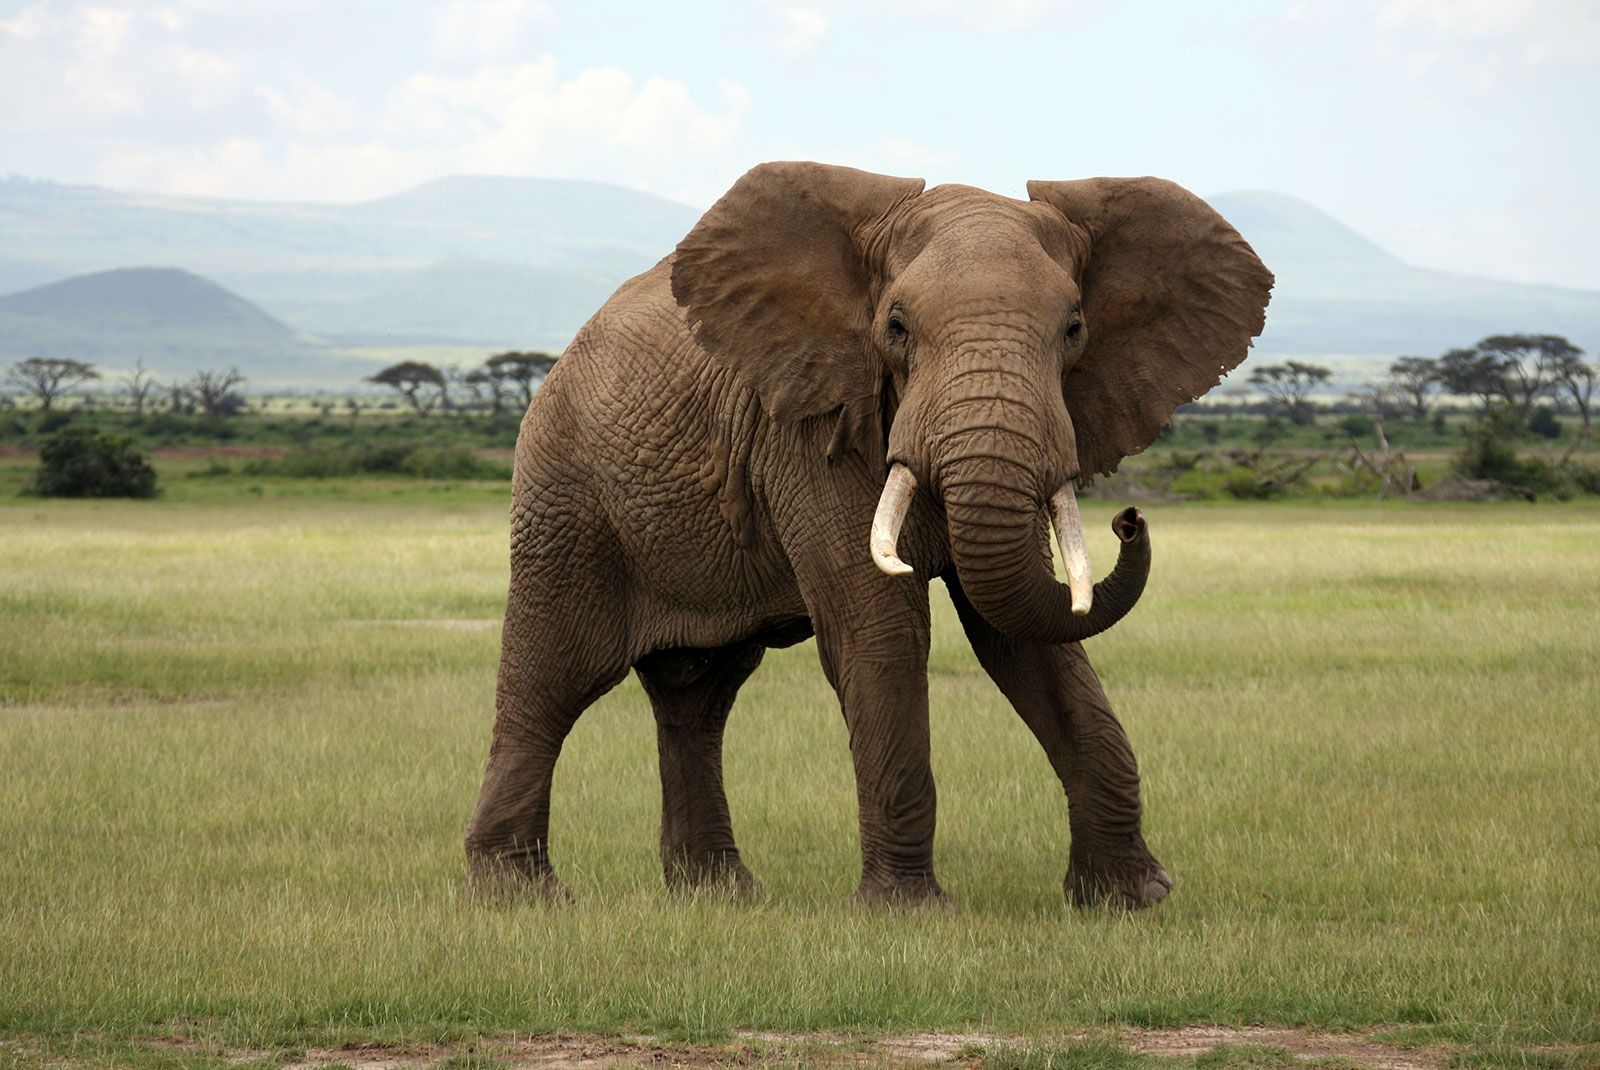

In [40]:

# 👉 Edit this with the exact Animal name from the dataset (case-insensitive)
chosen_name = "African Elephant"
# find a picture of your animal and add it here
animal_pic = "https://cdn.britannica.com/72/272-050-E1965E27/African-elephant-Kenya.jpg"
image = Image(animal_pic)
display(image)


In [34]:
#search for the animal in the dataset
mask = animals["Animal"].str.lower() == chosen_name.lower()
if mask.any():
    print(f"{chosen_name} found in dataset")
    display(animals[mask])
else:
    print(f"{chosen_name} not found in dataset")


African Elephant found in dataset


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
2,African Elephant,290.0,4350.0,Grey,65.0,Herbivore,"Savannah, Forest","Lions, Hyenas",25.0,Africa,Vulnerable,Elephantidae,650.0,40.0,Herd-based,1


In [42]:

def get_similar_group(df, chosen_row):
    candidates = []
    if "Family" in df.columns and pd.notna(chosen_row.get("Family", np.nan)):
        fam = chosen_row["Family"]
        grp = df[df["Family"] == fam]
        if len(grp) >= 3:
            return grp, f"Family: {fam}"
        candidates.append(("Family", fam, len(grp)))
    if "Habitat" in df.columns and pd.notna(chosen_row.get("Habitat", np.nan)):
        hab = chosen_row["Habitat"]
        grp = df[df["Habitat"] == hab]
        if len(grp) >= 3:
            return grp, f"Habitat: {hab}"
        candidates.append(("Habitat", hab, len(grp)))
    if "Diet" in df.columns and pd.notna(chosen_row.get("Diet", np.nan)):
        diet = chosen_row["Diet"]
        grp = df[df["Diet"] == diet]
        if len(grp) >= 3:
            return grp, f"Diet: {diet}"
        candidates.append(("Diet", diet, len(grp)))
    return df, "All Animals (fallback)"


In [43]:

mask = animals["Animal"].str.lower() == chosen_name.lower()
if not mask.any():
    raise ValueError(f"Animal named '{chosen_name}' not found. Try another from animals['Animal'].unique()[:25]")

chosen = animals[mask].iloc[0]
group_df, group_desc = get_similar_group(animals, chosen)

print("You chose:", chosen["Animal"])
print("Conservation Status:", chosen.get("Conservation Status", "N/A"))
print("Comparison Group:", group_desc, f"(n={len(group_df)})")

cols_to_show = [c for c in [
    "Animal","Conservation Status","Family","Habitat","Diet",
    "Height (cm)","Weight (kg)","Lifespan (years)",
    "Average Speed (km/h)","Top Speed (km/h)","Gestation Period (days)",
] if c in animals.columns]

chosen_profile = pd.DataFrame([chosen[cols_to_show].to_dict()])
chosen_profile


You chose: African Elephant
Conservation Status: Vulnerable
Comparison Group: Family: Elephantidae (n=3)


,Animal,Conservation Status,Family,Habitat,Diet,Height (cm),Weight (kg),Lifespan (years),Average Speed (km/h),Top Speed (km/h),Gestation Period (days)
0,African Elephant,Vulnerable,Elephantidae,"Savannah, Forest",Herbivore,290.0,4350.0,65.0,25.0,40.0,650.0



## 6) Compare Your Animal to Similar Species
We'll compare your chosen animal to others in the selected group for basic traits and risk.


In [44]:

summary_stats = group_df.agg({
    c: ["mean","median"] for c in ["Height (cm)","Weight (kg)","Lifespan (years)"] if c in group_df.columns
})
summary_stats


,Height (cm),Weight (kg),Lifespan (years)
mean,1580.0,6616.666667,50.833333
median,290.0,4350.000000,65.000000


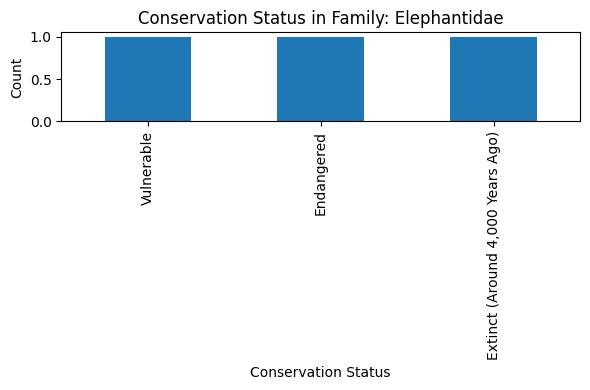

In [45]:

if "Conservation Status" in group_df.columns:
    group_df["Conservation Status"].value_counts().plot(kind="bar", figsize=(6,4))
    plt.title(f"Conservation Status in {group_desc}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


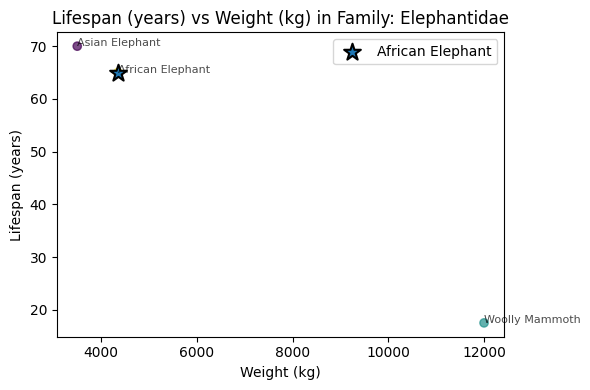

In [47]:

xcol, ycol = "Weight (kg)", "Lifespan (years)"
if xcol in group_df.columns and ycol in group_df.columns:
    status_codes = group_df["Conservation Status"].astype("category").cat.codes if "Conservation Status" in group_df.columns else np.zeros(len(group_df))
    plt.figure(figsize=(6,4))
    plt.scatter(group_df[xcol], group_df[ycol], c=status_codes, alpha=0.7)
    plt.scatter(chosen[xcol], chosen[ycol], s=160, edgecolor="black", linewidth=1.5, marker="*", label=chosen["Animal"])

    # Show names for each animal
    for _, row in group_df.iterrows():
        plt.text(row[xcol], row[ycol], str(row["Animal"]), fontsize=8, alpha=0.7)

    plt.title(f"{ycol} vs {xcol} in {group_desc}")
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.legend()
    plt.tight_layout()
    plt.show()




## 7) Your Turn: Ask a Question, Find Evidence
Pick **one** prompt (or create your own) and answer below:
- Does your animal have a **longer or shorter lifespan** than similar species? Might that affect its risk?
- Is your animal **heavier or lighter** than the group? How could that matter for survival?
- Which **Conservation Status** is most common in this group, and why might that be?

**Type your brief answer here (markdown):**



## 8) (Optional) Try Another Comparison
Change `chosen_name` at the top and re‑run cells **from step 5 onward**. Try a different animal.



## 9) Reflection (Exit Ticket)
- What **surprised** you in the data today?
- How did **cleaning** the data change what you could learn?
- If you were designing a **conservation project**, which animals would you focus on—and why?

---

_Last updated: 2025-10-21 20:05 UTC_
